In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import soundfile as sf
import scipy as sp

In [2]:
# Specify the path to the .ogg file
file_path = "minha_voz.ogg"

# Read the .ogg file
my_voice_data, my_voice_sample_rate = sf.read(file_path)

# Print the audio data and sample rate
print("Audio Data:", my_voice_data)
print("Sample Rate:", my_voice_sample_rate)

Audio Data: [-3.05175781e-05 -3.05175781e-05 -3.05175781e-05 ... -1.28173828e-03
 -1.19018555e-03 -1.19018555e-03]
Sample Rate: 16000


In [3]:
Audio(data=my_voice_data, rate=my_voice_sample_rate)

In [4]:
N = len(my_voice_data) # Number of samples
fs = my_voice_sample_rate # Sampling frequency
audio_duration = N / fs # Duration in seconds of the audio

time = np.linspace(0, audio_duration, N) # time vector

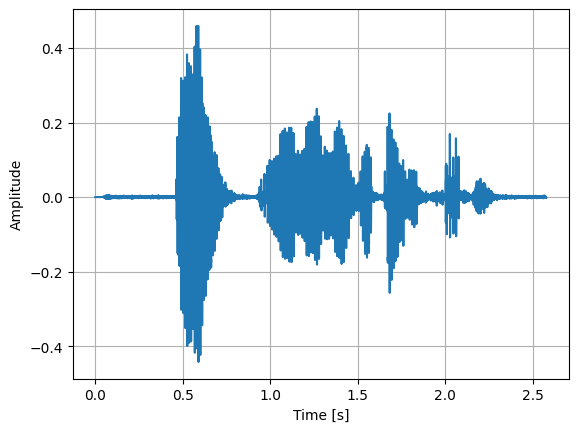

In [5]:
plt.plot(time, my_voice_data)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

The Audio of my voice is a not periodic signal and so it has finite energy.

In [6]:
myvoice_energy = np.sum(my_voice_data**2)
print("Energy of my voice:", myvoice_energy, 'J')

Energy of my voice: 111.67812212649733 J


The frequency spectrum of my voice

In [11]:
spectrum_my_voice_data = np.fft.fft(my_voice_data)

# since it's a real signal, we only need half of the spectrum
spectrum_my_voice_data = spectrum_my_voice_data[:len(spectrum_my_voice_data)//2]

# we want to plot only the absolute value of the spectrum
abs_spectrum_my_voice_data = np.abs(spectrum_my_voice_data)

# to better understand the spectrum, we will normalize it
abs_spectrum_my_voice_data = abs_spectrum_my_voice_data / np.max(abs_spectrum_my_voice_data)

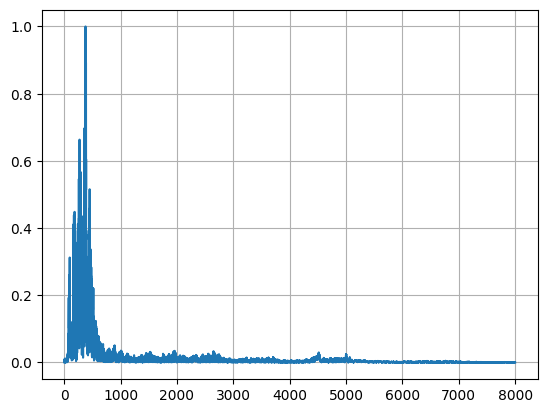

In [12]:
# Frequencies vector
frequencies = np.linspace(0, fs/2, N//2)

plt.plot(frequencies, abs_spectrum_my_voice_data)
plt.grid()

My voice it's compose by more than one frequency. We can found the predominat frequency using argmax function. However, I will use the scipy library find_peaks function, that returns the frequencies that had amplitude bigger than a treshould (height).

In [31]:
my_voice_frequencies_range = sp.signal.find_peaks(abs_spectrum_my_voice_data, height=0.5)[0]
frequencies[my_voice_frequencies_range]

array([152.39040109, 159.7014848 , 162.67161256, 163.81396939,
       168.61186808, 169.06881081, 169.52575354, 170.66811037,
       171.35352447, 172.26740993, 172.95282403, 208.59435712,
       209.73671395, 210.65059941, 211.10754215, 211.56448488,
       212.02142761, 212.47837034, 213.16378444, 213.62072717,
       218.19015449, 218.87556859, 219.78945405, 220.47486815,
       220.93181088, 221.84569635, 222.53111044, 222.98805318,
       223.44499591, 223.90193864, 224.58735274, 225.27276683,
       225.72970957, 226.41512366, 226.8720664 , 227.32900913,
       228.01442323, 265.02678451])

### Questão 2

Goal: Using the Fourier Transform discover what's the musical note of each file.

In [19]:
# Specify the path to the .ogg file
file_path = "./Notas Musicais/audio_1.wav"

# Read the .ogg file
audio_1_data, audio_1_sample_rate = sf.read(file_path)

# Print the audio sample rate
print("Sample Rate:", audio_1_sample_rate)

Sample Rate: 44100


In [20]:
Audio(data=audio_1_data, rate=audio_1_sample_rate)

In [22]:
N = len(audio_1_data) # Number of samples
fs = audio_1_sample_rate # Sampling frequency
audio_duration = N / fs # Duration in seconds of the audio

time = np.linspace(0, audio_duration, N) # time vector

In [23]:
spectrum_audio_1_data = np.fft.fft(audio_1_data)
# we only need half of the spectrum
spectrum_audio_1_data = spectrum_audio_1_data[:N//2]

# we want to plot only the absolute value of the spectrum
abs_spectrum_audio_1_data = np.abs(spectrum_audio_1_data)

# to better understand the spectrum, we will normalize it
abs_spectrum_audio_1_data = abs_spectrum_audio_1_data / np.max(abs_spectrum_audio_1_data)

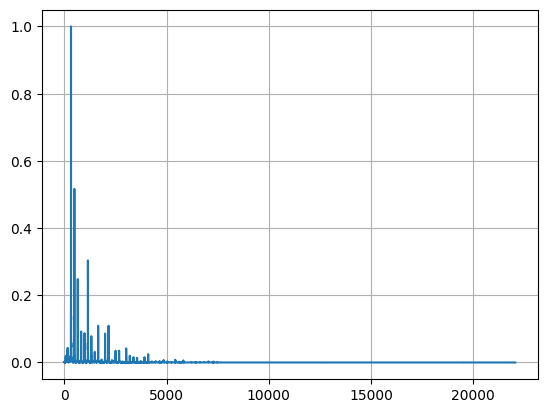

In [25]:
# Frequencies vector
frequencies = np.linspace(0, fs/2, N//2)

plt.plot(frequencies, abs_spectrum_audio_1_data)
plt.grid()

In [28]:
frequencies[np.argmax(abs_spectrum_my_voice_data)]

np.float64(267.30108990124717)

Since the frequency with high amplitude is approx. 267.30Hz we can say that this is a C note.

Sample Rate: 44100
267.30108990124717
Sample Rate: 44100
528.9951573849879
Sample Rate: 44100
227.6119958327132
Sample Rate: 44100
1940.4159869494292
Sample Rate: 44100
221.8456963454943


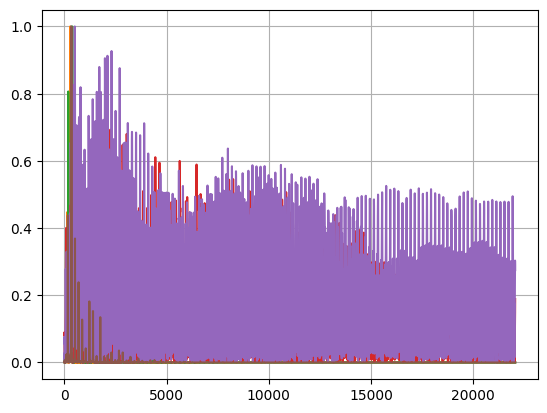

In [30]:
for i in range(1, 6):
    # Specify the path to the .ogg file
    file_path = f"./Notas Musicais/audio_{i}.wav"

    # Read the .ogg file
    audio_1_data, fs = sf.read(file_path)

    # Print the audio sample rate
    print("Sample Rate:", audio_1_sample_rate)

    N = len(audio_1_data) # Number of samples
    audio_duration = N / fs # Duration in seconds of the audio

    time = np.linspace(0, audio_duration, N) # time vector

    spectrum_audio_1_data = np.fft.fft(audio_1_data)
    # we only need half of the spectrum
    spectrum_audio_1_data = spectrum_audio_1_data[:N//2]
    
    # we want to plot only the absolute value of the spectrum
    abs_spectrum_audio_1_data = np.abs(spectrum_audio_1_data)
    
    # to better understand the spectrum, we will normalize it
    abs_spectrum_audio_1_data = abs_spectrum_audio_1_data / np.max(abs_spectrum_audio_1_data)

    # Frequencies vector
    frequencies = np.linspace(0, fs/2, N//2)

    plt.plot(frequencies, abs_spectrum_audio_1_data)
    plt.grid()

    print(frequencies[np.argmax(abs_spectrum_my_voice_data)])